<a href="https://colab.research.google.com/github/ajha7/CS151-HW_2/blob/master/assignment/a1/NNBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Basics


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/datasci-w266/2025-fall-main/blob/master/assignment/a1/NNBasics.ipynb)

### Brief Review of Machine Learning

In supervised learning, parametric models are those where the model is a function of a fixed form with a number of unknown _parameters_.  Together with a loss function and a training set, an optimizer can select parameters to minimize the loss with respect to the training set.  Common optimizers include stochastic gradient descent.  It tweaks the parameters slightly to move the loss "downhill" due to a small batch of examples from the training set.

## Part A:  Linear & Logistic Regression

You've likely seen linear regression before.  In linear regression, we fit a line (technically, hyperplane) that predicts a target variable, $y$, based on some features $x$.  The form of this model is affine (even if we call it "linear"):  

$$y_{hat} = xW + b$$

where $W$ and $b$ are weights and an offset, respectively, and are the parameters of this parametric model.  The loss function that the optimizer uses to fit these parameters is the squared error ($||\cdots||_2$) between the prediction and the ground truth in the training set.

You've also likely seen logistic regression, which is tightly related to linear regression.  Logistic regression also fits a line - this time separating the positive and negative examples of a binary classifier.  The form of this model is similar:

$$y_{hat} = \sigma(xW + b)$$

where again $W$ and $b$ are the parameters of this model, and $\sigma$ is the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) which maps un-normalized scores ("logits") to values $\hat{y} \in [0,1]$ that represent probabilities. The loss function that the optimizer uses to fit these parameters is the [cross entropy](../../materials/lesson_notebook/lesson_1_NN_Review.ipynb) between the prediction and the ground truth in the training set.

This pattern of an affine transform, $xW + b$, occurs over and over in machine learning.

**We'll use logistic regression as our running example for the rest of this part.**


### Short Answer Questions

Imagine you want to implement logistic regression:

* `z = xW + b`
* `y_hat = sigmoid(z)`

Where:
1.  `x` is an 11-dimensional feature vector
2.  `W` is the weight vector
3.  `b` is the bias term

What are the dimensions of `W` and `b`?  Recall that in logistic regression, `z` is just a scalar (commonly referred to as the "logit").

W is 11x1
b is 1

Sketch a picture of the whole equation using rectangles to illustrate the dimensions of `x`, `W`, and `b`.  See examples below for inspiration (though please label each dimension).  We don't ask you to submit this, but make sure you can do it!  It's the "print" debugging statement of neural networks!  It's also useful for reading papers... if you can't draw the shapes of all the tensors, you don't (yet) know what's going on!

## Part B: Batching

Let's say we want to perform inference using your model (parameters `W` and `b`) above on multiple examples instead of just one. On modern hardware (especially GPUs), we can do this efficiently by *batching*.

To do this, we stack up the feature vectors in x like in the diagram below.  Note that changing the number of examples you run on (i.e. your batch size) *does not* affect the number of parameters in your model.  You're just running the same thing in parallel (instead of running the above one feature vector at a time at a time).

![](https://github.com/datasci-w266/2025-fall-main/blob/master/assignment/a1/batchaffine.png?raw=1)

The red (# features) and blue (batch size) lines represent dimensions that are the same.

### Short Answer Questions

If we have 11 features and running the model in parallel with 30 examples, what are the dimensions of:

1. `W` 11x1
2. `b` 1
3. `x` 30x11
4. `z` 30x1

_Hint:_ remember that your model parameters stay fixed!

## Part C: Logistic Regression - NumPy Implementation

In this section, we'll implement logistic regression by hand and compute a few values to make sure we understand what's going on!

Let's say your model has the following parameters:

In [1]:
import numpy as np

W = np.array([45,6,3,25,-1])
b = 5

If you want to run the model on the following three examples:

* [1, 2, 3, 4, 5]
* [0, 0, 0, 0, 5]
* [-3, -4, -12, -1, 1]

Construct the x matrix **such that you compute the answer all in one big batch** and compute the probability of the positive class for each.

In [3]:
# Import sigmoid.
from scipy.special import expit as sigmoid

example_1 = np.array([1, 2, 3, 4, 5])
example_2 = np.array([0, 0, 0, 0, 5])
example_3 = np.array([-3, -4, -12, -1, 1])

### YOUR CODE HERE
x = np.array((example_1, example_2, example_3))
print(x)
z = np.dot(x, W) + b
y_hat = sigmoid(z)
print(y_hat)

### END YOUR CODE

[[  1   2   3   4   5]
 [  0   0   0   0   5]
 [ -3  -4 -12  -1   1]]
[1.00000000e+00 5.00000000e-01 1.55737037e-94]


### Short Answer Questions

1. What is the probability of the positive class for the second (middle) example? It is **0.5**
2. What is the cross-entropy loss in Base 2 of the second example if its label is positive? -log2(0.5) = **1.0**


## Part D: NumPy Feed Forward Neural Network

Let's do the same procedure for a simple feed-forward neural network.

Imagine you have a 3 layer network (hint: # of affines = # of layers. The affine is the W + b part of a layer).  Each hidden layer is size 10.  Just like before, you've already trained your model and you just want to run it forward.  For this exercise, let's say that each weight matrix is np.ones(...) and each bias term is [-1, -2, -3, ..., -n] if the bias term is $n$ long.  Compute the probability of the positive class for the three examples above, again in a single batch.

**Hint:  Draw the shapes of the matrices at each layer out on a piece of paper!  Include it with any questions you post to Ed Discussion.**

Assume your model uses a sigmoid as the nonlinearity for all layers.

In [13]:
### YOUR CODE HERE

x = np.array((example_1, example_2, example_3))

# Layer 1
W1 = np.ones((5, 10))
b1 = np.array([-1, -2, -3, -4, -5, -6, -7, -8, -9, -10])
z1 = np.dot(x, W1) + b1
a1 = sigmoid(z1)

# Layer 2

W2 = np.ones((10, 10))
b2 = np.array([-1, -2, -3, -4, -5, -6, -7, -8, -9, -10])
z2 = np.dot(a1, W2) + b2
a2 = sigmoid(z2)

# Layer 3 (Output)

W3 = np.ones((10, 1))
b3 = np.array([-1])
z3 = np.dot(a2, W3) + b3
y_hat = sigmoid(z3)

print(y_hat)

### END YOUR CODE

[[0.99967432]
 [0.95354128]
 [0.3691505 ]]


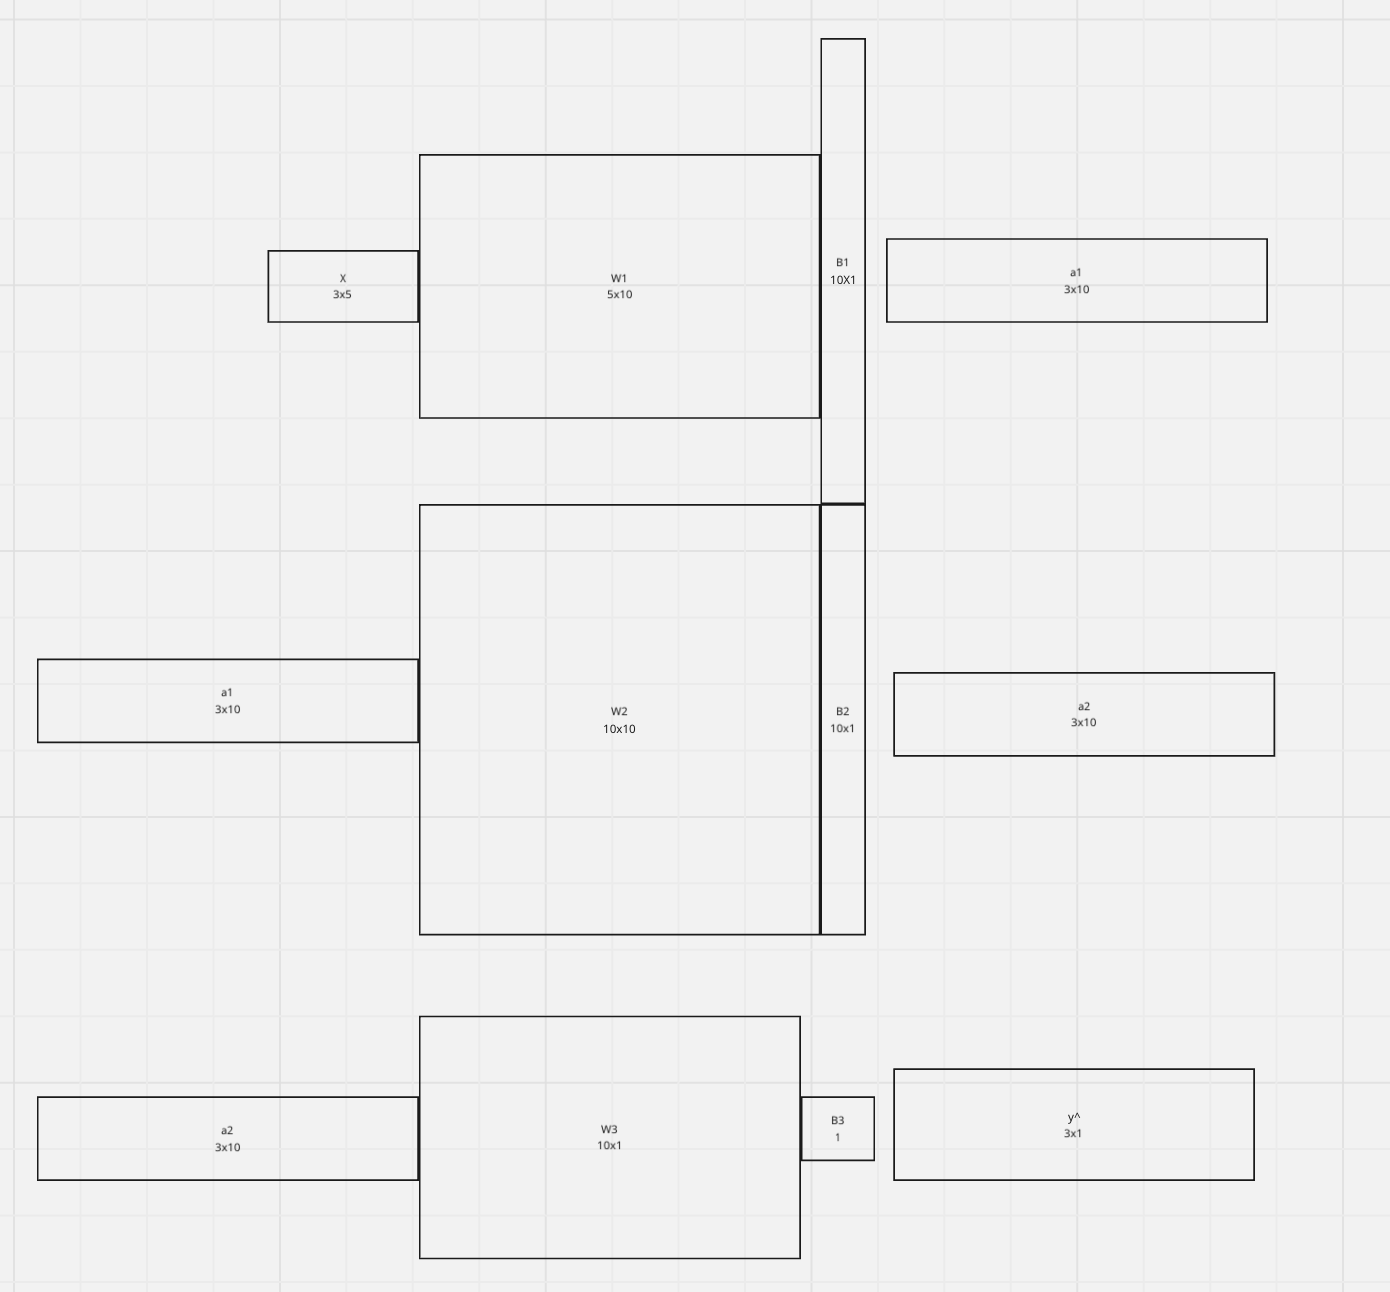

In [9]:
from IPython.display import Image, display

display(Image('matrix_sizes.png'))

### Short Answer Questions

1.  What is the probability of the third example? 0.3691505
2.  What is the cross-entropy loss if its label is negative? -log(1-y^) = 0.6718


## Part E: Softmax

Recall that softmax(z) is a vector with the same length as z, and whose components are:  $softmax(z)_i = \frac{e^{z_i}}{\Sigma_j e^{z_j}}$.

### Short Answer Questions

1. If the logits coming from the main body of the network are [4, 6, 8], what is the probability of the middle class?

subtract max_logit from logits([-4,-2, 0]), then softmax = **0.1173**

2. What is the cross-entropy loss if the correct class is the last one? (i.e. corresponding to logit=8)?
last class probability = 1 / 1.1536(the sum from prev softmax calc)
ce = -log2(0.8664) = **0.1435**

3. If you had such a three-class classification problem, what would the dimensions of W and b be for the last layer of the feed forward neural network above? W = 10x3, b = 3x1


In [14]:
!ls -la

total 148
drwxr-xr-x 1 root root   4096 Sep 16 05:00 .
drwxr-xr-x 1 root root   4096 Sep 16 00:04 ..
drwxr-xr-x 4 root root   4096 Sep  9 13:46 .config
drwxr-xr-x 2 root root   4096 Sep 16 05:00 .ipynb_checkpoints
-rw-r--r-- 1 root root 129471 Sep 16 04:59 matrix_sizes.png
drwxr-xr-x 1 root root   4096 Sep  9 13:46 sample_data


In [15]:
!ls -la *.ipynb

ls: cannot access '*.ipynb': No such file or directory
